In [1]:
from ydata_profiling import ProfileReport
import os
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import load_model
from helpers6 import PlotROCCurve, get_lstm_data_gen
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, roc_auc_score,confusion_matrix, recall_score, f1_score, precision_score, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

import time
confidence_interval = 95
random_seed = 0

- Importing the training and test datasets

In [153]:
output_path = 'C:\\Users\\User\\Downloads'
path = output_path
train = pd.read_csv((os.path.join(path, 'train_impute_v3.csv')))
test = pd.read_csv((os.path.join(path, 'test_impute_v3.csv')))

In [154]:
print(len(train[train['outcome_ed_revisit_3d']==1]))

print(len(train[train['outcome_ed_revisit_3d']==0]))

11910
346045


In [40]:
# impute the triage_acuity with median

# df_train = train.copy()#.reset_index(drop=True, inplace=True)
# df_test = test.copy()#.reset_index(drop=True, inplace=True)

# df = pd.concat([df_train,df_test], axis=0)


In [155]:

train['triage_acuity'] = train['triage_acuity'].fillna(np.nanmedian(df['triage_acuity']))
test['triage_acuity'] = test['triage_acuity'].fillna(np.nanmedian(df['triage_acuity']))


In [3]:
## splitting x and y variable for final dataset

# X_train_3 = train.copy()
# X_train_3 = X_train_3.drop(['outcome_ed_revisit_3d'],axis=1)
# X_test_3 = test.copy()
# X_test_3 = X_test_3.drop(['outcome_ed_revisit_3d'],axis=1)


# y_train = train['outcome_ed_revisit_3d'].copy()
# y_test = test['outcome_ed_revisit_3d'].copy()

In [68]:
len(train)

354181

In [156]:
train = train[(train['outcome_inhospital_mortality'] == 0) & (train['ed_death'] == 0)]
test = test[(test['outcome_inhospital_mortality'] == 0) & (test['ed_death'] == 0)]


In [7]:
# profile = ProfileReport(train,title = "HealthdataProfiling")
# profile.to_file("HealthdataProfiling")

- Dropping features of high correlation

In [157]:
variable = ["age", "gender", "intime_ed", "outtime_ed", 
            #"outcome_hospitalization", 
            "outcome_icu_transfer_12h", 
            #"outcome_critical",
            
            
            "n_ed_30d", 
            #"n_ed_90d", "n_ed_365d", "n_hosp_30d", "n_hosp_90d", 
            "n_hosp_365d", "n_icu_30d", 
            #"n_icu_90d", "n_icu_365d", 
            "ed_los_hours",
            "triage_temperature",
            #"triage_pain", 
            "triage_acuity", 
            #"triage_heartrate",
            "triage_resprate","triage_o2sat",
            #"triage_sbp",'triage_MAP',
            "triage_dbp",
            
            "chiefcom_chest_pain", "chiefcom_abdominal_pain", "chiefcom_headache", 
            "chiefcom_shortness_of_breath", "chiefcom_back_pain", "chiefcom_cough", 
            "chiefcom_nausea_vomiting", "chiefcom_fever_chills", "chiefcom_syncope",
            "chiefcom_dizziness",
            
            "cci_MI", 
            #"cci_CHF", 
            "cci_PVD", 
            "cci_Stroke", "cci_Dementia", "cci_Pulmonary", 
            "cci_Rheumatic", "cci_PUD", "cci_Liver1", 
            #"cci_DM1", 
            "cci_DM2", 
            "cci_Paralysis",
            #"cci_Renal", "cci_Cancer1",  "cci_Cancer2", 
            "cci_HIV","cci_Liver2",
            
            "eci_Arrhythmia", "eci_Valvular", "eci_PHTN", 
            #"eci_HTN1", "eci_HTN2",  
            #"eci_CHF",
           #"eci_PVD", "eci_Pulmonary",
            #"eci_Paralysis",
            #"eci_DM1",
            #"eci_DM2",
            #"eci_Renal",
            #"eci_Liver","eci_PUD",
            #"eci_HIV",
            #"eci_Tumor2",
            "eci_Tumor1",
            "eci_NeuroOther", "eci_Hypothyroid", "eci_Lymphoma", "eci_Coagulopathy", 
            #"eci_Rheumatic",
            "eci_Obesity", "eci_WeightLoss", 
            #"eci_FluidsLytes",
            "eci_BloodLoss", 
            "eci_Anemia", "eci_Alcohol", "eci_Drugs", "eci_Psychoses", "eci_Depression",
            
            "ed_temperature_last", "ed_heartrate_last", "ed_resprate_last", 
            "ed_o2sat_last", "ed_sbp_last", 
            #"ed_dbp_last", 
            "ed_pain_last","n_med"
            #"n_medrecon",
           
#           'insurance_Medicaid', 'insurance_Medicare', 'insurance_Other',
#             #'score_CCI', 'score_CART', 'score_REMS', 
            #'score_NEWS','score_NEWS2', 'score_MEWS'
           ]

outcome = "outcome_ed_revisit_3d"



In [158]:
X_train = train[variable].copy()
y_train = train[outcome].copy()
X_test = test[variable].copy()
y_test = test[outcome].copy()

In [10]:
# X_train = all & uncorrelated & unscaled variables 
# X_train_1 = TOP 18 important & uncorrelated dataset variables
# X_train_2 = TOP __ only binned dataset variables
# X_train_3 = TOP __ only sclaed variables
# X_train_4 = TOP 15 scaled & binned dataset  variables


In [72]:
X_train.dtypes.to_frame().T

,age,gender,intime_ed,outtime_ed,outcome_icu_transfer_12h,n_ed_30d,n_hosp_365d,n_icu_30d,ed_los_hours,triage_temperature,triage_acuity,triage_resprate,triage_o2sat,triage_dbp,chiefcom_chest_pain,chiefcom_abdominal_pain,chiefcom_headache,chiefcom_shortness_of_breath,chiefcom_back_pain,chiefcom_cough,chiefcom_nausea_vomiting,chiefcom_fever_chills,chiefcom_syncope,chiefcom_dizziness,cci_MI,cci_PVD,cci_Stroke,cci_Dementia,cci_Pulmonary,cci_Rheumatic,cci_PUD,cci_Liver1,cci_DM2,cci_Paralysis,cci_HIV,cci_Liver2,eci_Arrhythmia,eci_Valvular,eci_PHTN,eci_Tumor1,eci_NeuroOther,eci_Hypothyroid,eci_Lymphoma,eci_Coagulopathy,eci_Obesity,eci_WeightLoss,eci_BloodLoss,eci_Anemia,eci_Alcohol,eci_Drugs,eci_Psychoses,eci_Depression,ed_temperature_last,ed_heartrate_last,ed_resprate_last,ed_o2sat_last,ed_sbp_last,ed_pain_last,n_med
0,float64,int64,object,object,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64


### General processing of dataset

- Recoding gender & Extracting hour from the timestamp

In [159]:
X_train_1 = X_train.copy()
X_test_1 = X_test.copy()

In [160]:
encoder = LabelEncoder()
X_train_1['gender'] = encoder.fit_transform(X_train_1['gender'])
X_test_1['gender'] = encoder.transform(X_test_1['gender'])

#Formatting the timestamp
X_train_1['intime_ed'] = pd.to_datetime(X_train_1['intime_ed'], format='%Y-%m-%d %H:%M:%S')
X_test_1['intime_ed'] = pd.to_datetime(X_test_1['intime_ed'], format='%Y-%m-%d %H:%M:%S')

X_train_1['intime_ed'] = pd.to_datetime(X_train_1['intime_ed']).dt.hour
X_test_1['intime_ed'] = pd.to_datetime(X_test_1['intime_ed']).dt.hour

X_train_1['outtime_ed'] = pd.to_datetime(X_train_1['outtime_ed']).dt.hour
X_test_1['outtime_ed'] = pd.to_datetime(X_test_1['outtime_ed']).dt.hour


In [161]:
X_train_2 = X_train.copy()
X_test_2 = X_test.copy()
X_train_3 = X_train_1.copy()
X_test_3 = X_test_1.copy()

- Extracting Weekday & Extracting and bining hour from the timestamp

In [162]:
#Formatting the timestamp
X_train_2['intime_ed'] = pd.to_datetime(X_train_2['intime_ed'], format='%Y-%m-%d %H:%M:%S')
X_test_2['intime_ed'] = pd.to_datetime(X_test_2['intime_ed'], format='%Y-%m-%d %H:%M:%S')

X_train_2['outtime_ed'] = pd.to_datetime(X_train_2['outtime_ed'], format='%Y-%m-%d %H:%M:%S')
X_test_2['outtime_ed'] = pd.to_datetime(X_test_2['outtime_ed'], format='%Y-%m-%d %H:%M:%S')



# Extracting the day of the week (Monday=0, Sunday=6)
X_train_2['day_of_week_in'] = X_train_2['intime_ed'].dt.dayofweek
X_test_2['day_of_week_in'] = X_test_2['intime_ed'].dt.dayofweek

X_train_2['day_of_week_out'] = X_train_2['outtime_ed'].dt.dayofweek
X_test_2['day_of_week_out'] = X_test_2['outtime_ed'].dt.dayofweek

# map the numeric representation to the day names.
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
X_train_2['day_of_week_in'] = X_train_2['day_of_week_in'].map(lambda x: day_names[x])
X_test_2['day_of_week_in'] = X_test_2['day_of_week_in'].map(lambda x: day_names[x])

X_train_2['day_of_week_out'] = X_train_2['day_of_week_out'].map(lambda x: day_names[x])
X_test_2['day_of_week_out'] = X_test_2['day_of_week_out'].map(lambda x: day_names[x])

#Extracting the hour of the day (in 24-hour format)
X_train_2['hour_of_day_in'] = X_train_2['intime_ed'].dt.hour
X_test_2['hour_of_day_in'] = X_test_2['intime_ed'].dt.hour

X_train_2['hour_of_day_out'] = X_train_2['outtime_ed'].dt.hour
X_test_2['hour_of_day_out'] = X_test_2['outtime_ed'].dt.hour


- Binning the hour

In [163]:
# Define a function to map hours to shifts
def get_shift(hour):
    if 0 <= hour < 8:
        return 'Shift 1 (00:00 hr to 08:00 hr)'
    elif 8 <= hour < 16:
        return 'Shift 2 (08:00 hr to 16:00 hr)'
    else:
        return 'Shift 3 (16:00 hr to 24:00 hr)'

# Apply the function to create the 'shift' column
X_train_2['shift_in'] = X_train_2['hour_of_day_in'].apply(get_shift)
X_test_2['shift_in'] = X_test_2['hour_of_day_in'].apply(get_shift)

X_train_2['shift_out'] = X_train_2['hour_of_day_out'].apply(get_shift)
X_test_2['shift_out'] = X_test_2['hour_of_day_out'].apply(get_shift)


- Create "age" bins using bin_width interval of 5 years

In [164]:
# Define the minimum and maximum age values and the bin interval
min_age = int(X_train_2['age'].min())
max_age = int(X_train_2['age'].max())
bin_interval = 5

# Create bin edges using fixed-width binning with a 5-year interval
bin_edges = list(range(min_age, max_age, bin_interval)) + [float('inf')]

# Apply the binning to the 'age' column for train dataset
X_train_2['age_binned'] = pd.cut(X_train_2['age'], bins=bin_edges, right=False)

## Apply the binning to the 'age' column for test dataset
X_test_2['age_binned'] = pd.cut(X_test_2['age'], bins=bin_edges, right=False)

X_train_2['age_binned'].value_counts()

[53.0, 58.0)    30993
[58.0, 63.0)    29844
[23.0, 28.0)    28487
[48.0, 53.0)    27796
[63.0, 68.0)    27605
[28.0, 33.0)    25620
[18.0, 23.0)    25401
[68.0, 73.0)    24830
[33.0, 38.0)    22415
[43.0, 48.0)    22274
[38.0, 43.0)    20558
[73.0, 78.0)    20144
[78.0, 83.0)    17106
[83.0, 88.0)    14912
[88.0, 93.0)    12502
[93.0, 98.0)     3428
[98.0, inf)       266
Name: age_binned, dtype: int64

- Using one-hot encoding for categorical variables

In [165]:
# Assign a list to capture all categorical variables
# more categorical variables can be added to this list
cat_features = ['age_binned','gender','day_of_week_in','day_of_week_out','shift_in','shift_out']

enc = OneHotEncoder(drop='first') # first col dropped
enc.fit(X_train_2[cat_features])

# One-hot encoding for categorical variable in the train set
feature_enc_train = pd.DataFrame(enc.transform(X_train_2[cat_features]).toarray())
# Assign column header for the encoded field
feature_enc_train.columns = enc.get_feature_names_out(cat_features)
# drop original columns
X_train_2 = X_train_2.drop(columns = cat_features)
# join dfs together
X_train_2 = pd.concat([X_train_2.reset_index(drop=True), feature_enc_train], axis='columns')

# One-hot encoding for categorical variable in the test set
feature_enc_test = pd.DataFrame(enc.transform(X_test_2[cat_features]).toarray())
feature_enc_test.columns = enc.get_feature_names_out(cat_features)
# drop original columns
X_test_2 = X_test_2.drop(columns = cat_features)
# join dfs together
X_test_2 = pd.concat([X_test_2.reset_index(drop=True), feature_enc_test], axis='columns')


In [166]:
X_train_2.drop(['intime_ed','outtime_ed','hour_of_day_in','hour_of_day_out','age'],axis = 'columns',inplace = True)
X_test_2.drop(['intime_ed','outtime_ed','hour_of_day_in','hour_of_day_out','age'],axis = 'columns',inplace = True)

### 4. Feature Scaling of Numerical Variables

In [20]:
# X_train_3 is only scaled

In [167]:
# List the numerical variables which require scaling
num_features = ['n_ed_30d', 
       'n_hosp_365d', 'n_icu_30d','ed_los_hours',
       'triage_temperature', 'triage_resprate',
       'triage_o2sat', 'triage_dbp','triage_acuity',
        'ed_temperature_last','ed_heartrate_last', 'ed_resprate_last', 'ed_o2sat_last', 'ed_sbp_last',
       'ed_pain_last', 'n_med']

# instantiate MinMaxScaler to normalise the numeric fields
minmax = MinMaxScaler()
minmax.fit(X_train_3[num_features])

# Feature scaling for train set
feature_scaling_train = pd.DataFrame(minmax.transform(X_train_3[num_features]))
feature_scaling_train.columns = num_features
X_train_3 = X_train_3.drop(columns = num_features) # drop original columns
X_train_3 = pd.concat([X_train_3.reset_index(drop=True), feature_scaling_train], axis='columns')



# Feature scaling for test set
feature_scaling_test = pd.DataFrame(minmax.transform(X_test_3[num_features]))
feature_scaling_test.columns = num_features
X_test_3 = X_test_3.drop(columns = num_features) # drop original columns
X_test_3 = pd.concat([X_test_3.reset_index(drop=True), feature_scaling_test], axis='columns')


In [22]:
# X_train_4 is only scaled and binned

In [168]:
X_train_4 = X_train_2.copy()
X_test_4 = X_test_2.copy()

minmax.fit(X_train_4[num_features])

# Feature scaling for train set
feature_scaling_train = pd.DataFrame(minmax.transform(X_train_4[num_features]))
feature_scaling_train.columns = num_features
X_train_4 = X_train_4.drop(columns = num_features) # drop original columns
X_train_4 = pd.concat([X_train_4.reset_index(drop = True), feature_scaling_train], axis = 'columns') # join dfs together

# Feature scaling for test set
feature_scaling_test = pd.DataFrame(minmax.transform(X_test_4[num_features]))
feature_scaling_test.columns = num_features
X_test_4 = X_test_4.drop(columns = num_features) # drop original columns
X_test_4 = pd.concat([X_test_4.reset_index(drop = True),feature_scaling_test], axis = 'columns') # join dfs together

In [83]:


X_train.isnull().sum()

age                             0
gender                          0
intime_ed                       0
outtime_ed                      0
outcome_icu_transfer_12h        0
n_ed_30d                        0
n_hosp_365d                     0
n_icu_30d                       0
ed_los_hours                    0
triage_temperature              0
triage_acuity                   0
triage_resprate                 0
triage_o2sat                    0
triage_dbp                      0
chiefcom_chest_pain             0
chiefcom_abdominal_pain         0
chiefcom_headache               0
chiefcom_shortness_of_breath    0
chiefcom_back_pain              0
chiefcom_cough                  0
chiefcom_nausea_vomiting        0
chiefcom_fever_chills           0
chiefcom_syncope                0
chiefcom_dizziness              0
cci_MI                          0
cci_PVD                         0
cci_Stroke                      0
cci_Dementia                    0
cci_Pulmonary                   0
cci_Rheumatic 

(1) X_train_1 Using Decision Tree to acquire initial feature importance

In [84]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_1,y_train)

# #Predict the response for test dataset
# y_pred = clf.predict(X_test_1)


In [ ]:
# # Model Accuracy, how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


In [85]:
FI_1 = clf.feature_importances_
df_1 = pd.DataFrame({'Feature':X_train.columns,'Importances':FI_1}).sort_values(by = "Importances",ascending = False)
df_1

,Feature,Importances
8,ed_los_hours,0.086197
56,ed_sbp_last,0.076274
0,age,0.073155
13,triage_dbp,0.067476
53,ed_heartrate_last,0.064228
9,triage_temperature,0.062789
52,ed_temperature_last,0.059024
5,n_ed_30d,0.050979
2,intime_ed,0.043393
3,outtime_ed,0.042586


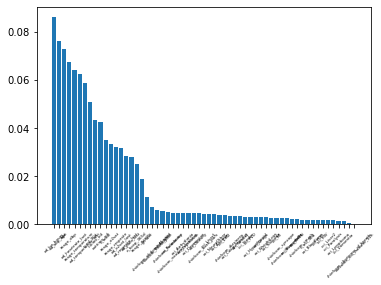

In [87]:
plt.bar(df_1['Feature'],df_1['Importances'])
plt.xticks(rotation=45,fontsize = 4)
plt.show()

In [88]:
important_feature_1 = df_1.loc[df_1['Importances']>0.01]['Feature'].values

In [89]:
X_train_1 = X_train_1[important_feature_1]
X_test_1 = X_test_1[important_feature_1]

print('class ratio')
ratio = y_train.sum()/(~y_train).sum()
print('positive : negative =', ratio, ': 1')

class ratio
positive : negative = -0.03253025212379469 : 1


(2) X_train_2 Using Decision Tree to obtain initial feature importance

In [90]:
# Train Decision Tree Classifer
clf_2 = clf.fit(X_train_2,y_train)



In [91]:
FI_2 = clf_2.feature_importances_
df_2 = pd.DataFrame({'Feature':X_train_2.columns,'Importances':FI_2}).sort_values(by = "Importances",ascending = False)

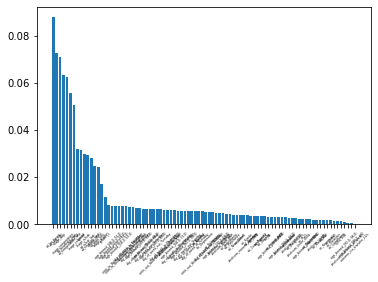

In [92]:
plt.bar(df_2['Feature'],df_2['Importances'])
plt.xticks(rotation=45, fontsize = 3)
plt.show()

In [94]:
important_feature_2 = df_2.loc[df_2['Importances']>0.01]['Feature'].values

X_train_2 = X_train_2[important_feature_2]
X_test_2 = X_test_2[important_feature_2]

print('class ratio')
ratio = y_train.sum()/(~y_train).sum()
print('positive : negative =', ratio, ': 1')

class ratio
positive : negative = -0.03253025212379469 : 1


(3) X_train_3 Using Decision Tree to acquire initial feature importance

In [95]:
# Train Decision Tree Classifer
clf_3 = clf.fit(X_train_3,y_train)



In [96]:
FI_3 = clf_3.feature_importances_
df_3 = pd.DataFrame({'Feature':X_train_3.columns,'Importances':FI_3}).sort_values(by = "Importances",ascending = False)


In [151]:
print(df_3)

                         Feature  Importances
46                  ed_los_hours     0.083205
56                   ed_sbp_last     0.076082
50                    triage_dbp     0.069343
0                            age     0.069306
53             ed_heartrate_last     0.065172
47            triage_temperature     0.063193
52           ed_temperature_last     0.060565
43                      n_ed_30d     0.051033
2                      intime_ed     0.043499
3                     outtime_ed     0.043095
58                         n_med     0.033555
48               triage_resprate     0.032629
49                  triage_o2sat     0.032334
55                 ed_o2sat_last     0.030842
54              ed_resprate_last     0.030454
57                  ed_pain_last     0.027656
44                   n_hosp_365d     0.026566
51                 triage_acuity     0.018339
1                         gender     0.010634
6        chiefcom_abdominal_pain     0.007010
5            chiefcom_chest_pain  

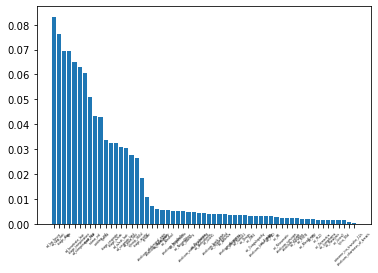

In [97]:
plt.bar(df_3['Feature'],df_3['Importances'])
plt.xticks(rotation=45, fontsize = 3)
plt.show()

In [98]:
important_feature_3 = df_3.loc[df_3['Importances']>0.01]['Feature'].values

X_train_3 = X_train_3[important_feature_3]
X_test_3 = X_test_3[important_feature_3]

print('class ratio')
ratio = y_train.sum()/(~y_train).sum()
print('positive : negative =', ratio, ': 1')

class ratio
positive : negative = -0.03253025212379469 : 1


(4) X_train_4 Using Decision Tree to acquire initial feature importance

In [169]:
# Train Decision Tree Classifer
clf_4 = clf.fit(X_train_4,y_train)

In [173]:
FI_4 = clf_4.feature_importances_
df_4 = pd.DataFrame({'Feature':X_train_4.columns,'Importances':FI_4}).sort_values(by = "Importances",ascending = False)
df_4

ValueError: All arrays must be of the same length

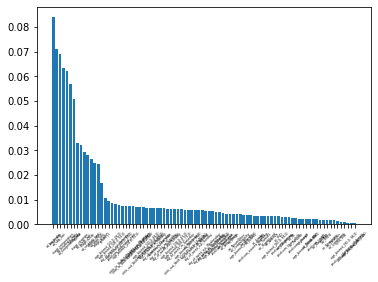

In [174]:

plt.bar(df_4['Feature'],df_4['Importances'])
plt.xticks(rotation=45, fontsize = 3)
plt.show()

In [172]:
important_feature_4 = df_4.loc[df_4['Importances']>0.01]['Feature'].values

X_train_4 = X_train_4[important_feature_4]
X_test_4 = X_test_4[important_feature_4]

print('class ratio')
ratio = y_train.sum()/(~y_train).sum()
print('positive : negative =', ratio, ': 1')

class ratio
positive : negative = -0.03253025212379469 : 1


In [133]:
#producing scaled dataset

X_train_4.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

X_test_4.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

train_impute_scaled = pd.concat([X_train_4,y_train], axis=1)
test_impute_scaled = pd.concat([X_test_4, y_test], axis=1)

train_impute_scaled.to_csv((os.path.join(path, 'train_impute_scaled.csv')),index = False)
test_impute_scaled.to_csv((os.path.join(path, 'test_impute_scaled.csv')),index = False)

In [143]:
len(X_train_4.columns)

16

In [103]:
# Containers for all results
result_list = []
result_list_1 = []
result_list_2 = []
result_list_3 = []
result_list_4 = []

(1) LR for X_train_1

Logistic Regression:


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training time: 4.136115074157715 seconds
AUC: 0.6754220811284453
AUPRC: 0.14021702734294134
Sensitivity: 0.5847774379884472
Specificity: 0.6572046277901133
Score thresold: 0.03162111100611848
2.5 97.5


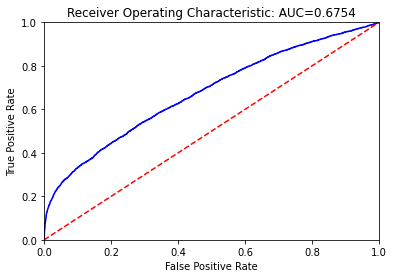

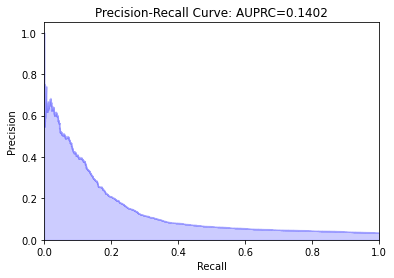

In [104]:
# LR for X_train_1


print("Logistic Regression:")
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
start = time.time()
logreg.fit(X_train_1,y_train)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
probs = logreg.predict_proba(X_test_1)
result = PlotROCCurve(probs[:,1],y_test, ci=confidence_interval, random_seed=random_seed)

results = ["LR"]
results.extend(result)
results.append(runtime)
result_list_1.append(results)



(2) LR for X_train_2

Logistic Regression:


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training time: 3.7546005249023438 seconds
AUC: 0.6756624055408891
AUPRC: 0.14112871673144572
Sensitivity: 0.5834182806659871
Specificity: 0.6648358069416851
Score thresold: 0.030846457323787095
2.5 97.5


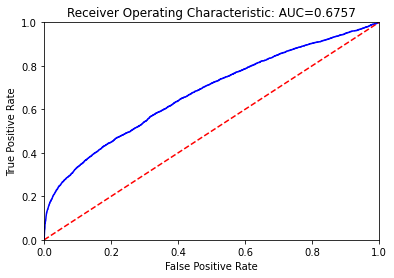

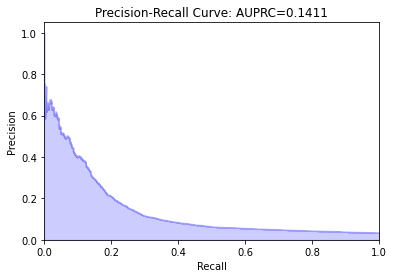

In [105]:
# (2) LR for X_train_2

print("Logistic Regression:")
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
start = time.time()
logreg.fit(X_train_2,y_train)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
probs = logreg.predict_proba(X_test_2)
result = PlotROCCurve(probs[:,1],y_test, ci=confidence_interval, random_seed=random_seed)

results = ["LR"]
results.extend(result)
results.append(runtime)
result_list_2.append(results)



(3) LR for X_train_3

Logistic Regression:


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training time: 3.9841113090515137 seconds
AUC: 0.6503144212794448
AUPRC: 0.12422370682823176
Sensitivity: 0.5392456676860347
Specificity: 0.6712749795489072
Score thresold: 0.033951111445005205
2.5 97.5


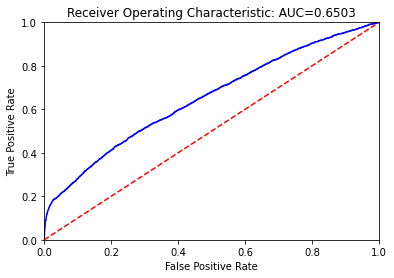

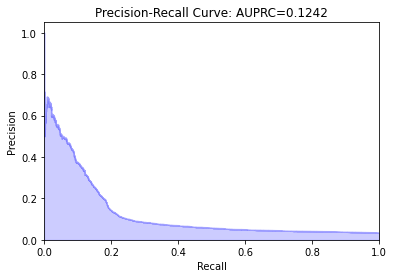

In [106]:
# (3) LR for X_train_3

print("Logistic Regression:")
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
start = time.time()
logreg.fit(X_train_3,y_train)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
probs = logreg.predict_proba(X_test_3)
result = PlotROCCurve(probs[:,1],y_test, ci=confidence_interval, random_seed=random_seed)

results = ["LR"]
results.extend(result)
results.append(runtime)
result_list_3.append(results)



(4) LR for X_train_4

Logistic Regression:


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training time: 3.5021870136260986 seconds
AUC: 0.6735976165269528
AUPRC: 0.1412325448507521
Sensitivity: 0.6027862725110431
Specificity: 0.637407970082973
Score thresold: 0.030719202406051117
2.5 97.5


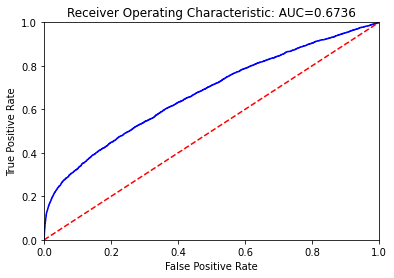

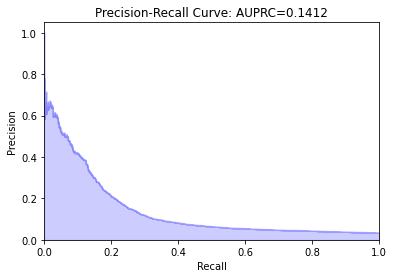

In [107]:
# (4) LR for X_train_4

print("Logistic Regression:")
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
start = time.time()
logreg.fit(X_train_4,y_train)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
probs = logreg.predict_proba(X_test_4)
result = PlotROCCurve(probs[:,1],y_test, ci=confidence_interval, random_seed=random_seed)

results = ["LR"]
results.extend(result)
results.append(runtime)
result_list_4.append(results)



- RF for X_train_1

RandomForest:
Training time: 61.562493324279785 seconds
AUC: 0.6966294959296557
AUPRC: 0.14147884286732598
Sensitivity: 0.6493374108053007
Specificity: 0.6286432160804021
Score thresold: 0.04
2.5 97.5


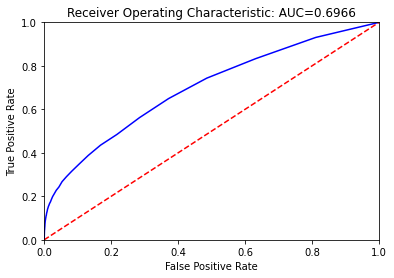

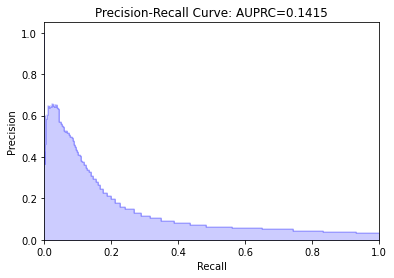

[0.09312658 0.08078422 0.08058135 0.08202573 0.07348854 0.07443062
 0.06455645 0.04663039 0.05467972 0.05297497 0.0419451  0.03718195
 0.03813055 0.03765872 0.03558298 0.03239584 0.04589366 0.01648269
 0.01144998]


In [108]:
print("RandomForest:")
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
start = time.time()
rf.fit(X_train_1,y_train)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
probs = rf.predict_proba(X_test_1)
result = PlotROCCurve(probs[:,1],y_test, ci=confidence_interval, random_seed=random_seed)
importances = rf.feature_importances_
print(importances)
results = ["RF"]
results.extend(result)
results.append(runtime)
result_list_1.append(results)



- RF for X_train_2

RandomForest:
Training time: 57.8193416595459 seconds
AUC: 0.6881749798705498
AUPRC: 0.1338209746457697
Sensitivity: 0.6248725790010193
Specificity: 0.6358770597171906
Score thresold: 0.04
2.5 97.5


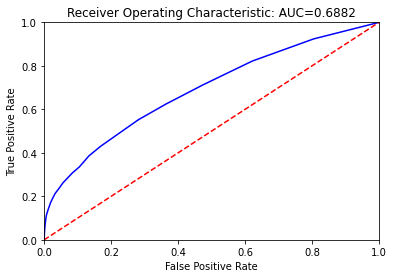

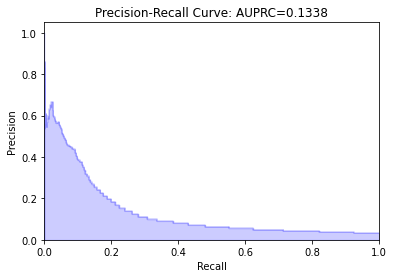

[0.12368785 0.1034619  0.10500843 0.09534966 0.09186701 0.07925355
 0.04790714 0.04736397 0.05020827 0.04571895 0.04707686 0.04325241
 0.04928596 0.03887048 0.01932171 0.01236585]


In [109]:
print("RandomForest:")
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
start = time.time()
rf.fit(X_train_2,y_train)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
probs = rf.predict_proba(X_test_2)
result = PlotROCCurve(probs[:,1],y_test, ci=confidence_interval, random_seed=random_seed)
importances = rf.feature_importances_
print(importances)
results = ["RF"]
results.extend(result)
results.append(runtime)
result_list_2.append(results)




- RF for X_train_3

RandomForest:
Training time: 58.13425946235657 seconds
AUC: 0.6976412179666557
AUPRC: 0.1422402385205933
Sensitivity: 0.6486578321440707
Specificity: 0.6289587472244946
Score thresold: 0.04
2.5 97.5


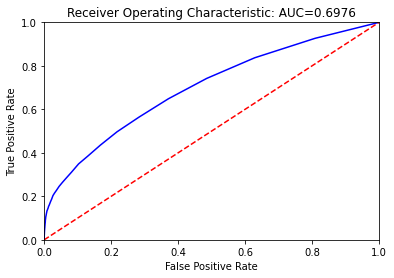

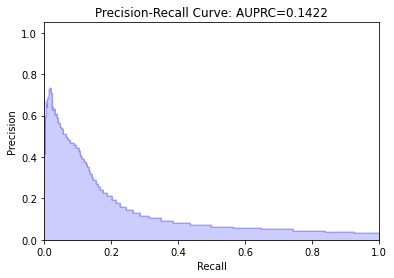

[0.09420929 0.08074546 0.08119786 0.08019956 0.07383109 0.07558657
 0.06397606 0.04604456 0.05443211 0.0532667  0.04278693 0.03792267
 0.03753809 0.03802639 0.03556042 0.03133369 0.04532241 0.01638203
 0.01163813]


In [110]:
print("RandomForest:")
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
start = time.time()
rf.fit(X_train_3,y_train)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
probs = rf.predict_proba(X_test_3)
result = PlotROCCurve(probs[:,1],y_test, ci=confidence_interval, random_seed=random_seed)
importances = rf.feature_importances_
print(importances)
results = ["RF"]
results.extend(result)
results.append(runtime)
result_list_3.append(results)


- RF for X_train_4

RandomForest:
Training time: 59.507938623428345 seconds
AUC: 0.6824491881528719
AUPRC: 0.13297985324147432
Sensitivity: 0.6224940536867143
Specificity: 0.6374780881149935
Score thresold: 0.04
2.5 97.5


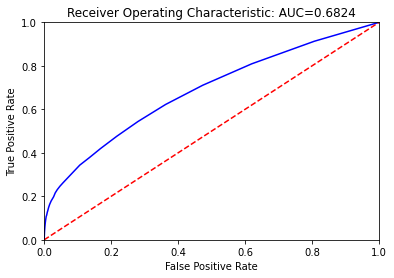

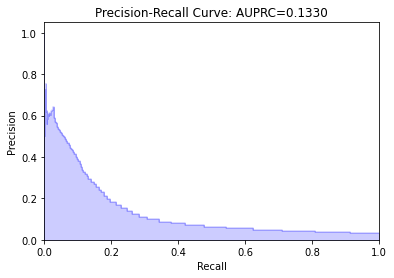

[0.12310718 0.10467744 0.10373668 0.0918653  0.09488631 0.07884435
 0.04794546 0.05014349 0.04595339 0.04678226 0.04649498 0.04326426
 0.04961868 0.03839875 0.02030039 0.01398107]


In [111]:
print("RandomForest:")
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
start = time.time()
rf.fit(X_train_4,y_train)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
probs = rf.predict_proba(X_test_4)
result = PlotROCCurve(probs[:,1],y_test, ci=confidence_interval, random_seed=random_seed)
importances = rf.feature_importances_
print(importances)
results = ["RF"]
results.extend(result)
results.append(runtime)
result_list_4.append(results)


- GB for X_train_1

GradientBoosting:
Training time: 59.50723958015442 seconds
AUC: 0.7398585452688375
AUPRC: 0.1568461519188912
Sensitivity: 0.6605504587155964
Specificity: 0.671239920532897
Score thresold: 0.03199822487532004
2.5 97.5


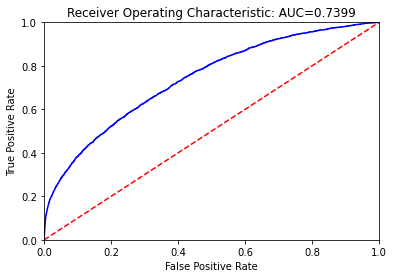

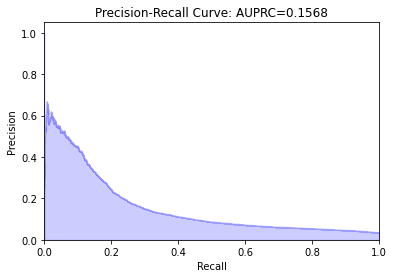

In [112]:
# GB for X_train_1
print("GradientBoosting:")
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
start = time.time()
gb.fit(X_train_1, y_train)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
probs = gb.predict_proba(X_test_1)
result = PlotROCCurve(probs[:,1],y_test, ci=confidence_interval, random_seed=random_seed)

results = ["GB"]
results.extend(result)
results.append(runtime)
result_list_1.append(results)


- GB for X_train_2

GradientBoosting:
Training time: 48.28288722038269 seconds
AUC: 0.734789396333301
AUPRC: 0.15518686004417798
Sensitivity: 0.6775399252463473
Specificity: 0.6467570410190487
Score thresold: 0.030890628280226772
2.5 97.5


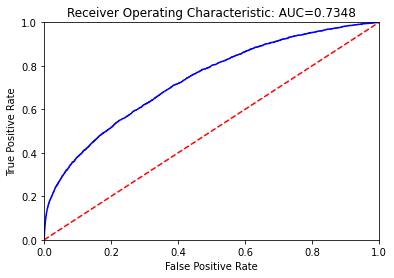

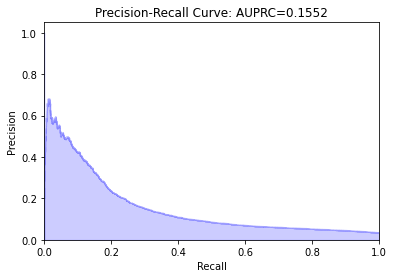

In [113]:
#- GB for X_train_2
print("GradientBoosting:")
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
start = time.time()
gb.fit(X_train_2, y_train)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
probs = gb.predict_proba(X_test_2)
result = PlotROCCurve(probs[:,1],y_test, ci=confidence_interval, random_seed=random_seed)

results = ["GB"]
results.extend(result)
results.append(runtime)
result_list_2.append(results)


- GB for X_train_3

GradientBoosting:
Training time: 59.082053661346436 seconds
AUC: 0.7398584023166825
AUPRC: 0.15684616370159987
Sensitivity: 0.6605504587155964
Specificity: 0.671239920532897
Score thresold: 0.03199822487532004
2.5 97.5


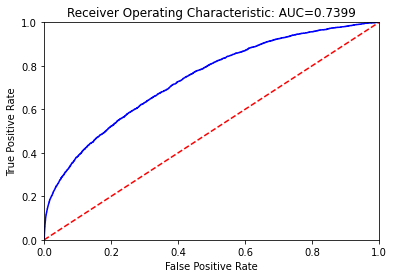

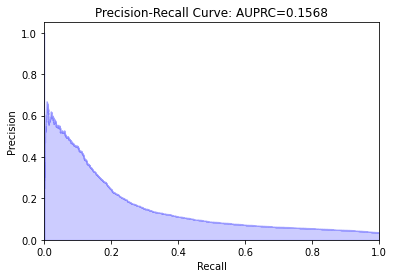

In [114]:
#- GB for X_train_3
print("GradientBoosting:")
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
start = time.time()
gb.fit(X_train_3, y_train)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
probs = gb.predict_proba(X_test_3)
result = PlotROCCurve(probs[:,1],y_test, ci=confidence_interval, random_seed=random_seed)

results = ["GB"]
results.extend(result)
results.append(runtime)
result_list_3.append(results)


- GB for X_train_4 

GradientBoosting:
Training time: 48.80731821060181 seconds
AUC: 0.7347894876638444
AUPRC: 0.15516214789552302
Sensitivity: 0.6775399252463473
Specificity: 0.6467570410190487
Score thresold: 0.030890628280226772
2.5 97.5


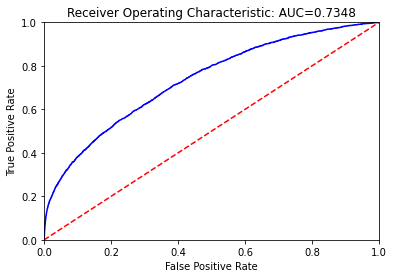

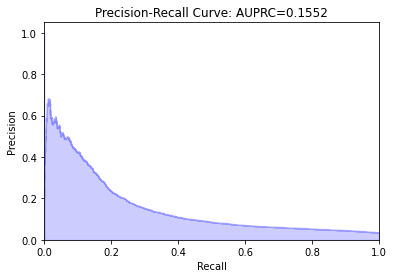

In [115]:
#- GB for X_train_4
print("GradientBoosting:")
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
start = time.time()
gb.fit(X_train_4, y_train)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
probs = gb.predict_proba(X_test_4)
result = PlotROCCurve(probs[:,1],y_test, ci=confidence_interval, random_seed=random_seed)

results = ["GB"]
results.extend(result)
results.append(runtime)
result_list_4.append(results)


In [ ]:
# MLP - X_train_1

In [142]:
len(X_train_4.columns)

16

In [116]:
class MLP(tf.keras.Model):
    def __init__(self):
        super(MLP, self).__init__()
        self.dense_1 = Dense(128, activation='relu')
        self.dense_2 = Dense(64, activation='relu')
        self.classifier = Dense(1, activation='sigmoid')

    def call(self, x):
        x = self.dense_1(x)
        x = self.dense_2(x)
        return self.classifier(x)

In [117]:
# skip this cell if not retraining
mlp = MLP()
mlp.compile(loss='binary_crossentropy', 
              optimizer=optimizers.Adam(learning_rate=0.001), 
              metrics=['accuracy', 'AUC',  #{'auprc': metrics.AUC(name='auprc', curve='PR')},
                       'TruePositives', 'TrueNegatives', 'Precision', 'Recall'])
start = time.time()
mlp.fit(X_train_1.astype(np.float32), y_train, batch_size=200, epochs=20)
runtime = time.time() - start
print('Training time:', runtime, 'seconds')
mlp.save('72h_ed_revisit_mlp')

Epoch 1/20
1771/1771 [==============================] - 3s 1ms/step - loss: 0.1479 - accuracy: 0.9660 - auc: 0.6282 - true_positives: 443.0000 - true_negatives: 341697.0000 - precision: 0.4352 - recall: 0.0372
Epoch 2/20
1771/1771 [==============================] - 2s 1ms/step - loss: 0.1362 - accuracy: 0.9667 - auc: 0.6821 - true_positives: 499.0000 - true_negatives: 341871.0000 - precision: 0.5544 - recall: 0.0419
Epoch 3/20
1771/1771 [==============================] - 2s 1ms/step - loss: 0.1340 - accuracy: 0.9667 - auc: 0.7044 - true_positives: 458.0000 - true_negatives: 341920.0000 - precision: 0.5654 - recall: 0.0385
Epoch 4/20
1771/1771 [==============================] - 2s 1ms/step - loss: 0.1332 - accuracy: 0.9667 - auc: 0.7109 - true_positives: 432.0000 - true_negatives: 341941.0000 - precision: 0.5662 - recall: 0.0363
Epoch 5/20
1771/1771 [==============================] - 2s 1ms/step - loss: 0.1324 - accuracy: 0.9667 - auc: 0.7192 - true_positives: 443.0000 - true_negatives:

INFO:tensorflow:Assets written to: 72h_ed_revisit_mlp\assets


MLP:
2767/2767 [==============================] - 2s 688us/step
AUC: 0.737538328550194
AUPRC: 0.15585827729453985
Sensitivity: 0.6479782534828407
Specificity: 0.6851232908729695
Score thresold: 0.030869305
2.5 97.5


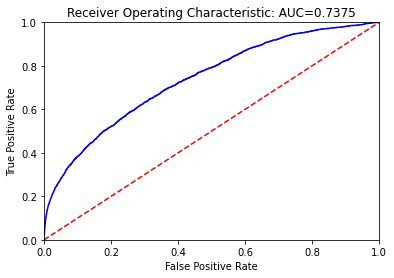

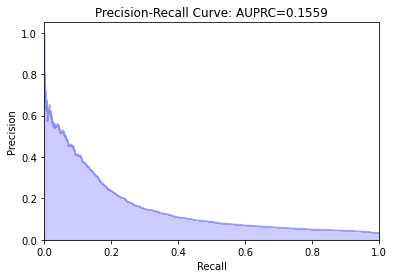

In [118]:
print("MLP:")
#mlp = load_model('72h_ed_revisit_mlp')
probs = mlp.predict(X_test_1.astype(np.float32))
result = PlotROCCurve(probs,y_test, ci=confidence_interval, random_seed=random_seed)
results = ["MLP"]
results.extend(result)
results.append(runtime)
result_list_1.append(results)


In [ ]:
# For X_train_2

In [119]:
# skip this cell if not retraining
mlp = MLP()
mlp.compile(loss='binary_crossentropy', 
              optimizer=optimizers.Adam(learning_rate=0.001), 
              metrics=['accuracy', 'AUC',  #{'auprc': metrics.AUC(name='auprc', curve='PR')},
                       'TruePositives', 'TrueNegatives', 'Precision', 'Recall'])
start = time.time()
mlp.fit(X_train_2.astype(np.float32), y_train, batch_size=200, epochs=20)
runtime = time.time() - start
print('Training time:', runtime, 'seconds')
mlp.save('72h_ed_revisit_mlp')

Epoch 1/20
1771/1771 [==============================] - 3s 1ms/step - loss: 0.1544 - accuracy: 0.9662 - auc: 0.6108 - true_positives: 525.0000 - true_negatives: 341668.0000 - precision: 0.4650 - recall: 0.0441
Epoch 2/20
1771/1771 [==============================] - 2s 1ms/step - loss: 0.1401 - accuracy: 0.9666 - auc: 0.6532 - true_positives: 546.0000 - true_negatives: 341811.0000 - precision: 0.5422 - recall: 0.0458
Epoch 3/20
1771/1771 [==============================] - 2s 1ms/step - loss: 0.1369 - accuracy: 0.9666 - auc: 0.6784 - true_positives: 518.0000 - true_negatives: 341831.0000 - precision: 0.5401 - recall: 0.0435
Epoch 4/20
1771/1771 [==============================] - 2s 1ms/step - loss: 0.1349 - accuracy: 0.9667 - auc: 0.6958 - true_positives: 492.0000 - true_negatives: 341879.0000 - precision: 0.5559 - recall: 0.0413
Epoch 5/20
1771/1771 [==============================] - 2s 1ms/step - loss: 0.1340 - accuracy: 0.9666 - auc: 0.7029 - true_positives: 468.0000 - true_negatives:

INFO:tensorflow:Assets written to: 72h_ed_revisit_mlp\assets


MLP:
2767/2767 [==============================] - 2s 702us/step
AUC: 0.73176605157134
AUPRC: 0.15648813840839437
Sensitivity: 0.6605504587155964
Specificity: 0.6625452845623466
Score thresold: 0.03401548
2.5 97.5


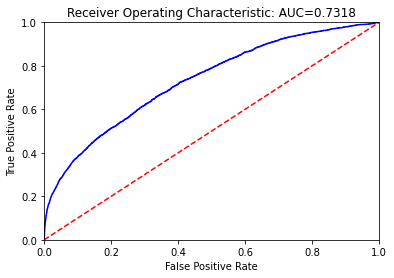

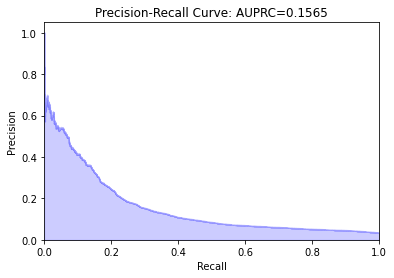

In [120]:
print("MLP:")
#mlp = load_model('72h_ed_revisit_mlp')
probs = mlp.predict(X_test_2.astype(np.float32))
result = PlotROCCurve(probs,y_test, ci=confidence_interval, random_seed=random_seed)
results = ["MLP"]
results.extend(result)
results.append(runtime)
result_list_2.append(results)


In [ ]:
# MLP - X_train_3

In [121]:
# skip this cell if not retraining
mlp = MLP()
mlp.compile(loss='binary_crossentropy', 
              optimizer=optimizers.Adam(learning_rate=0.001), 
              metrics=['accuracy', 'AUC',  #{'auprc': metrics.AUC(name='auprc', curve='PR')},
                       'TruePositives', 'TrueNegatives', 'Precision', 'Recall'])
start = time.time()
mlp.fit(X_train_3.astype(np.float32), y_train, batch_size=200, epochs=20)
runtime = time.time() - start
print('Training time:', runtime, 'seconds')
mlp.save('72h_ed_revisit_mlp')

Epoch 1/20
1771/1771 [==============================] - 3s 1ms/step - loss: 0.1578 - accuracy: 0.9646 - auc: 0.6321 - true_positives: 146.0000 - true_negatives: 341495.0000 - precision: 0.1582 - recall: 0.0123
Epoch 2/20
1771/1771 [==============================] - 2s 1ms/step - loss: 0.1366 - accuracy: 0.9667 - auc: 0.6795 - true_positives: 480.0000 - true_negatives: 341893.0000 - precision: 0.5588 - recall: 0.0403
Epoch 3/20
1771/1771 [==============================] - 2s 1ms/step - loss: 0.1356 - accuracy: 0.9667 - auc: 0.6884 - true_positives: 500.0000 - true_negatives: 341896.0000 - precision: 0.5708 - recall: 0.0420
Epoch 4/20
1771/1771 [==============================] - 2s 1ms/step - loss: 0.1346 - accuracy: 0.9668 - auc: 0.6951 - true_positives: 493.0000 - true_negatives: 341916.0000 - precision: 0.5807 - recall: 0.0414
Epoch 5/20
1771/1771 [==============================] - 2s 1ms/step - loss: 0.1339 - accuracy: 0.9666 - auc: 0.7012 - true_positives: 481.0000 - true_negatives:

INFO:tensorflow:Assets written to: 72h_ed_revisit_mlp\assets


MLP:
2767/2767 [==============================] - 2s 748us/step
AUC: 0.7274459064081917
AUPRC: 0.15345728542571116
Sensitivity: 0.6506965681277608
Specificity: 0.669007829846909
Score thresold: 0.029851807
2.5 97.5


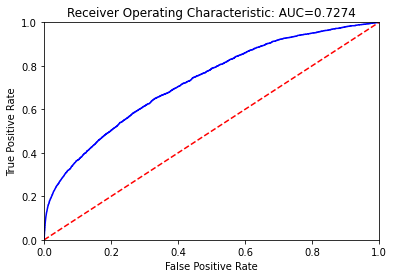

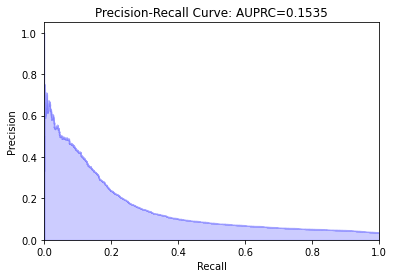

In [122]:
print("MLP:")
#mlp = load_model('72h_ed_revisit_mlp')
probs = mlp.predict(X_test_3.astype(np.float32))
result = PlotROCCurve(probs,y_test, ci=confidence_interval, random_seed=random_seed)
results = ["MLP"]
results.extend(result)
results.append(runtime)
result_list_3.append(results)


In [ ]:
# MLP -X_train_4

In [123]:
# skip this cell if not retraining
mlp = MLP()
mlp.compile(loss='binary_crossentropy', 
              optimizer=optimizers.Adam(learning_rate=0.001), 
              metrics=['accuracy', 'AUC',  #{'auprc': metrics.AUC(name='auprc', curve='PR')},
                       'TruePositives', 'TrueNegatives', 'Precision', 'Recall'])
start = time.time()
mlp.fit(X_train_4.astype(np.float32), y_train, batch_size=200, epochs=20)
runtime = time.time() - start
print('Training time:', runtime, 'seconds')
mlp.save('72h_ed_revisit_mlp')

Epoch 1/20
1771/1771 [==============================] - 3s 1ms/step - loss: 0.1395 - accuracy: 0.9666 - auc: 0.6499 - true_positives: 435.0000 - true_negatives: 341915.0000 - precision: 0.5492 - recall: 0.0365
Epoch 2/20
1771/1771 [==============================] - 2s 1ms/step - loss: 0.1357 - accuracy: 0.9666 - auc: 0.6672 - true_positives: 517.0000 - true_negatives: 341849.0000 - precision: 0.5500 - recall: 0.0434
Epoch 3/20
1771/1771 [==============================] - 2s 1ms/step - loss: 0.1353 - accuracy: 0.9667 - auc: 0.6744 - true_positives: 504.0000 - true_negatives: 341889.0000 - precision: 0.5682 - recall: 0.0423
Epoch 4/20
1771/1771 [==============================] - 2s 1ms/step - loss: 0.1349 - accuracy: 0.9668 - auc: 0.6794 - true_positives: 528.0000 - true_negatives: 341877.0000 - precision: 0.5720 - recall: 0.0443
Epoch 5/20
1771/1771 [==============================] - 3s 1ms/step - loss: 0.1341 - accuracy: 0.9667 - auc: 0.6914 - true_positives: 511.0000 - true_negatives:

INFO:tensorflow:Assets written to: 72h_ed_revisit_mlp\assets


MLP:
2767/2767 [==============================] - 2s 692us/step
AUC: 0.734180721940944
AUPRC: 0.15827354076865313
Sensitivity: 0.6574923547400612
Specificity: 0.666799111838261
Score thresold: 0.035562947
2.5 97.5


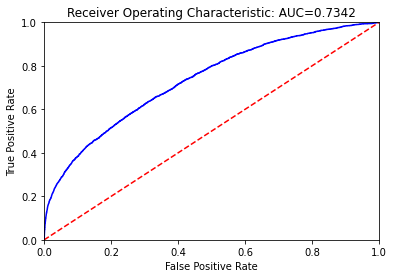

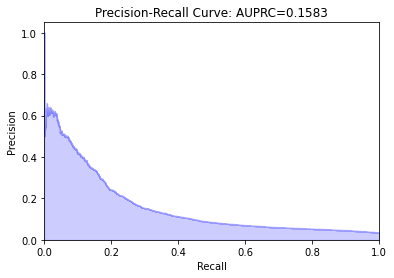

In [124]:
print("MLP:")
#mlp = load_model('72h_ed_revisit_mlp')
probs = mlp.predict(X_test_4.astype(np.float32))
result = PlotROCCurve(probs,y_test, ci=confidence_interval, random_seed=random_seed)
results = ["MLP"]
results.extend(result)
results.append(runtime)
result_list_4.append(results)


In [ ]:
#XGB - X_train_1

XGBoosting:
Training time: 13.883540391921997 seconds
AUC: 0.7352955382924944
AUPRC: 0.15194103000437145
Sensitivity: 0.6693849813115869
Specificity: 0.6587121654785555
Score thresold: 0.030015355
2.5 97.5


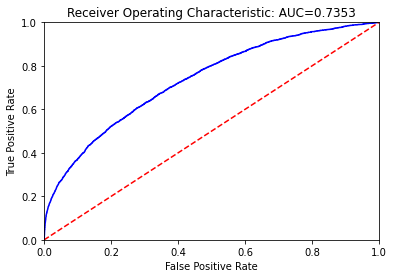

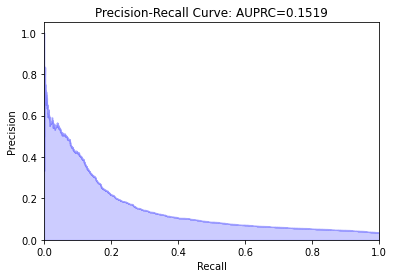

In [125]:
import xgboost as xgb
print("XGBoosting:")
xgb = xgb.XGBClassifier()
start = time.time()
xgb.fit(X_train_1, y_train)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
probs = xgb.predict_proba(X_test_1)
result = PlotROCCurve(probs[:,1],y_test, ci=confidence_interval, random_seed=random_seed)

results = ["XGB"]
results.extend(result)
results.append(runtime)
result_list_1.append(results)

In [ ]:
#XGB - X_train_2

XGBoosting:
Training time: 7.244752407073975 seconds
AUC: 0.7271754389455118
AUPRC: 0.14846934441392468
Sensitivity: 0.6296296296296297
Specificity: 0.6890265279887811
Score thresold: 0.03190737
2.5 97.5


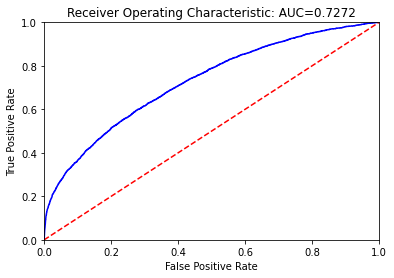

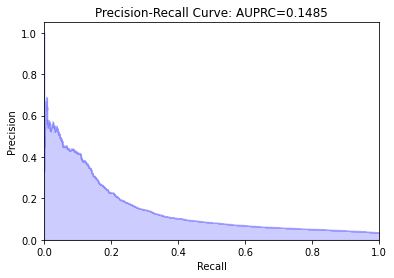

In [126]:
print("XGBoosting:")
start = time.time()
xgb.fit(X_train_2, y_train)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
probs = xgb.predict_proba(X_test_2)
result = PlotROCCurve(probs[:,1],y_test, ci=confidence_interval, random_seed=random_seed)

results = ["XGB"]
results.extend(result)
results.append(runtime)
result_list_2.append(results)

In [ ]:
#XGB - X_train_3

XGBoosting:
Training time: 8.799871444702148 seconds
AUC: 0.7352952722426505
AUPRC: 0.15199546624389887
Sensitivity: 0.6693849813115869
Specificity: 0.6587121654785555
Score thresold: 0.030015355
2.5 97.5


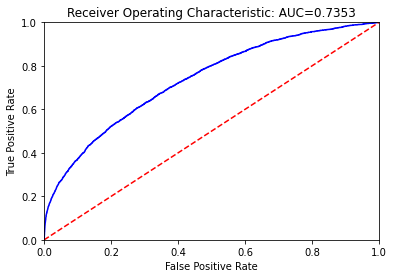

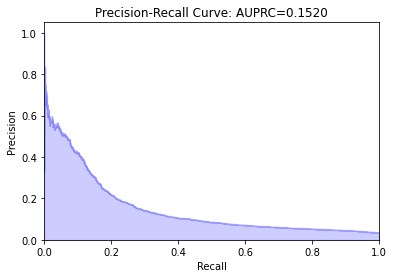

In [127]:
print("XGBoosting:")
start = time.time()
xgb.fit(X_train_3, y_train)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
probs = xgb.predict_proba(X_test_3)
result = PlotROCCurve(probs[:,1],y_test, ci=confidence_interval, random_seed=random_seed)

results = ["XGB"]
results.extend(result)
results.append(runtime)
result_list_3.append(results)

In [ ]:
#XGB - X_train_4

XGBoosting:
Training time: 8.303920030593872 seconds
AUC: 0.7271769478849255
AUPRC: 0.14843899905053717
Sensitivity: 0.6296296296296297
Specificity: 0.6890265279887811
Score thresold: 0.03190737
2.5 97.5


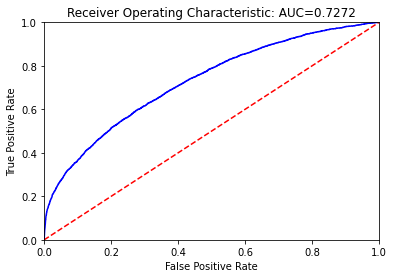

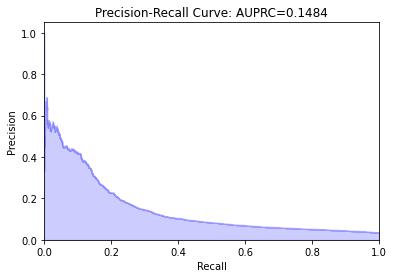

In [128]:
print("XGBoosting:")
start = time.time()
xgb.fit(X_train_4, y_train)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
probs = xgb.predict_proba(X_test_4)
result = PlotROCCurve(probs[:,1],y_test, ci=confidence_interval, random_seed=random_seed)

results = ["XGB"]
results.extend(result)
results.append(runtime)
result_list_4.append(results)

### 4. Performance output

In [ ]:
# X_train_1

In [129]:
#result_df = pd.read_csv(os.path.join(path, 'result_72h_ed_revivist_disposition.csv'))
result_df = pd.DataFrame(result_list_1, columns=['Model', 'auroc', 'ap', 'sensitivity', 'specificity', 'threshold', 'lower_auroc', 'upper_auroc', 'std_auroc', 'lower_ap', 'upper_ap', 'std_ap', 'lower_sensitivity', 'upper_sensitivity', 'std_sensitivity', 'lower_specificity', 'upper_specificity', 'std_specificity', 'runtime'])
# result_df.to_csv(os.path.join(path, 'result_72h_ed_revivist_disposition.csv'), index=False)
result_df = result_df.round(3)
formatted_result_df = pd.DataFrame()
formatted_result_df[['Model', 'Threshold']] = result_df[['Model', 'threshold']]
formatted_result_df['AUROC'] = result_df['auroc'].astype(str) + ' (' + result_df['lower_auroc'].astype(str) + \
                               '-' + result_df['upper_auroc'].astype(str) + ')'
formatted_result_df['AUPRC'] = result_df['ap'].astype(str) + ' (' + result_df['lower_ap'].astype(str) + \
                               '-' + result_df['upper_ap'].astype(str) + ')'
formatted_result_df['Sensitivity'] = result_df['sensitivity'].astype(str) + ' (' + result_df['lower_sensitivity'].astype(str) + \
                                     '-' + result_df['upper_sensitivity'].astype(str) + ')'
formatted_result_df['Specificity'] = result_df['specificity'].astype(str) + ' (' + result_df['lower_specificity'].astype(str) + \
                                     '-' + result_df['upper_specificity'].astype(str) + ')'
formatted_result_df[['Runtime']] = result_df[['runtime']]
# formatted_result_df.to_csv(os.path.join(path, 'task3.csv'), index=False)
formatted_result_df

,Model,Threshold,AUROC,AUPRC,Sensitivity,Specificity,Runtime
0,LR,0.032,0.675 (0.662-0.683),0.14 (0.125-0.148),0.585 (0.564-0.61),0.657 (0.627-0.67),4.136
1,RF,0.040,0.697 (0.689-0.703),0.141 (0.126-0.151),0.649 (0.635-0.662),0.629 (0.626-0.631),61.562
2,GB,0.032,0.74 (0.734-0.745),0.157 (0.142-0.165),0.661 (0.629-0.681),0.671 (0.651-0.7),59.507
3,MLP,0.031,0.738 (0.729-0.743),0.156 (0.138-0.163),0.648 (0.622-0.691),0.685 (0.638-0.706),50.485
4,XGB,0.030,0.735 (0.729-0.74),0.152 (0.136-0.162),0.669 (0.62-0.677),0.659 (0.652-0.711),13.884


In [ ]:
# X_train_2

In [130]:
#result_df = pd.read_csv(os.path.join(path, 'result_72h_ed_revivist_disposition.csv'))
result_df = pd.DataFrame(result_list_2, columns=['Model', 'auroc', 'ap', 'sensitivity', 'specificity', 'threshold', 'lower_auroc', 'upper_auroc', 'std_auroc', 'lower_ap', 'upper_ap', 'std_ap', 'lower_sensitivity', 'upper_sensitivity', 'std_sensitivity', 'lower_specificity', 'upper_specificity', 'std_specificity', 'runtime'])
# result_df.to_csv(os.path.join(path, 'result_72h_ed_revivist_disposition.csv'), index=False)
result_df = result_df.round(3)
formatted_result_df = pd.DataFrame()
formatted_result_df[['Model', 'Threshold']] = result_df[['Model', 'threshold']]
formatted_result_df['AUROC'] = result_df['auroc'].astype(str) + ' (' + result_df['lower_auroc'].astype(str) + \
                               '-' + result_df['upper_auroc'].astype(str) + ')'
formatted_result_df['AUPRC'] = result_df['ap'].astype(str) + ' (' + result_df['lower_ap'].astype(str) + \
                               '-' + result_df['upper_ap'].astype(str) + ')'
formatted_result_df['Sensitivity'] = result_df['sensitivity'].astype(str) + ' (' + result_df['lower_sensitivity'].astype(str) + \
                                     '-' + result_df['upper_sensitivity'].astype(str) + ')'
formatted_result_df['Specificity'] = result_df['specificity'].astype(str) + ' (' + result_df['lower_specificity'].astype(str) + \
                                     '-' + result_df['upper_specificity'].astype(str) + ')'
formatted_result_df[['Runtime']] = result_df[['runtime']]
# formatted_result_df.to_csv(os.path.join(path, 'task3.csv'), index=False)
formatted_result_df

,Model,Threshold,AUROC,AUPRC,Sensitivity,Specificity,Runtime
0,LR,0.031,0.676 (0.662-0.685),0.141 (0.127-0.149),0.583 (0.575-0.652),0.665 (0.591-0.674),3.755
1,RF,0.040,0.688 (0.678-0.692),0.134 (0.121-0.14),0.625 (0.577-0.64),0.636 (0.633-0.682),57.819
2,GB,0.031,0.735 (0.728-0.74),0.155 (0.14-0.166),0.678 (0.638-0.696),0.647 (0.633-0.689),48.283
3,MLP,0.034,0.732 (0.724-0.739),0.156 (0.141-0.164),0.661 (0.64-0.679),0.663 (0.648-0.679),48.819
4,XGB,0.032,0.727 (0.72-0.734),0.148 (0.136-0.158),0.63 (0.604-0.674),0.689 (0.639-0.723),7.245


In [ ]:
# X_train_3

In [131]:
#result_df = pd.read_csv(os.path.join(path, 'result_72h_ed_revivist_disposition.csv'))
result_df = pd.DataFrame(result_list_3, columns=['Model', 'auroc', 'ap', 'sensitivity', 'specificity', 'threshold', 'lower_auroc', 'upper_auroc', 'std_auroc', 'lower_ap', 'upper_ap', 'std_ap', 'lower_sensitivity', 'upper_sensitivity', 'std_sensitivity', 'lower_specificity', 'upper_specificity', 'std_specificity', 'runtime'])
# result_df.to_csv(os.path.join(path, 'result_72h_ed_revivist_disposition.csv'), index=False)
result_df = result_df.round(3)
formatted_result_df = pd.DataFrame()
formatted_result_df[['Model', 'Threshold']] = result_df[['Model', 'threshold']]
formatted_result_df['AUROC'] = result_df['auroc'].astype(str) + ' (' + result_df['lower_auroc'].astype(str) + \
                               '-' + result_df['upper_auroc'].astype(str) + ')'
formatted_result_df['AUPRC'] = result_df['ap'].astype(str) + ' (' + result_df['lower_ap'].astype(str) + \
                               '-' + result_df['upper_ap'].astype(str) + ')'
formatted_result_df['Sensitivity'] = result_df['sensitivity'].astype(str) + ' (' + result_df['lower_sensitivity'].astype(str) + \
                                     '-' + result_df['upper_sensitivity'].astype(str) + ')'
formatted_result_df['Specificity'] = result_df['specificity'].astype(str) + ' (' + result_df['lower_specificity'].astype(str) + \
                                     '-' + result_df['upper_specificity'].astype(str) + ')'
formatted_result_df[['Runtime']] = result_df[['runtime']]
# formatted_result_df.to_csv(os.path.join(path, 'task3.csv'), index=False)
formatted_result_df

,Model,Threshold,AUROC,AUPRC,Sensitivity,Specificity,Runtime
0,LR,0.034,0.65 (0.635-0.659),0.124 (0.109-0.133),0.539 (0.516-0.599),0.671 (0.601-0.688),3.984
1,RF,0.040,0.698 (0.688-0.703),0.142 (0.128-0.149),0.649 (0.628-0.658),0.629 (0.627-0.632),58.134
2,GB,0.032,0.74 (0.734-0.745),0.157 (0.142-0.165),0.661 (0.629-0.681),0.671 (0.651-0.7),59.082
3,MLP,0.030,0.727 (0.718-0.732),0.153 (0.138-0.161),0.651 (0.631-0.658),0.669 (0.659-0.685),47.820
4,XGB,0.030,0.735 (0.729-0.74),0.152 (0.136-0.162),0.669 (0.62-0.677),0.659 (0.652-0.711),8.800


In [ ]:
# X_train_4

In [132]:
#result_df = pd.read_csv(os.path.join(path, 'result_72h_ed_revivist_disposition.csv'))
result_df = pd.DataFrame(result_list_4, columns=['Model', 'auroc', 'ap', 'sensitivity', 'specificity', 'threshold', 'lower_auroc', 'upper_auroc', 'std_auroc', 'lower_ap', 'upper_ap', 'std_ap', 'lower_sensitivity', 'upper_sensitivity', 'std_sensitivity', 'lower_specificity', 'upper_specificity', 'std_specificity', 'runtime'])
# result_df.to_csv(os.path.join(path, 'result_72h_ed_revivist_disposition.csv'), index=False)
result_df = result_df.round(3)
formatted_result_df = pd.DataFrame()
formatted_result_df[['Model', 'Threshold']] = result_df[['Model', 'threshold']]
formatted_result_df['AUROC'] = result_df['auroc'].astype(str) + ' (' + result_df['lower_auroc'].astype(str) + \
                               '-' + result_df['upper_auroc'].astype(str) + ')'
formatted_result_df['AUPRC'] = result_df['ap'].astype(str) + ' (' + result_df['lower_ap'].astype(str) + \
                               '-' + result_df['upper_ap'].astype(str) + ')'
formatted_result_df['Sensitivity'] = result_df['sensitivity'].astype(str) + ' (' + result_df['lower_sensitivity'].astype(str) + \
                                     '-' + result_df['upper_sensitivity'].astype(str) + ')'
formatted_result_df['Specificity'] = result_df['specificity'].astype(str) + ' (' + result_df['lower_specificity'].astype(str) + \
                                     '-' + result_df['upper_specificity'].astype(str) + ')'
formatted_result_df[['Runtime']] = result_df[['runtime']]
# formatted_result_df.to_csv(os.path.join(path, 'task3.csv'), index=False)
formatted_result_df

,Model,Threshold,AUROC,AUPRC,Sensitivity,Specificity,Runtime
0,LR,0.031,0.674 (0.659-0.682),0.141 (0.127-0.149),0.603 (0.577-0.622),0.637 (0.623-0.656),3.502
1,RF,0.040,0.682 (0.675-0.688),0.133 (0.119-0.141),0.622 (0.608-0.629),0.637 (0.635-0.641),59.508
2,GB,0.031,0.735 (0.728-0.74),0.155 (0.14-0.166),0.678 (0.638-0.696),0.647 (0.633-0.689),48.807
3,MLP,0.036,0.734 (0.726-0.739),0.158 (0.143-0.167),0.657 (0.634-0.665),0.667 (0.665-0.695),52.019
4,XGB,0.032,0.727 (0.72-0.734),0.148 (0.136-0.158),0.63 (0.604-0.674),0.689 (0.639-0.723),8.304


In [ ]:
importance_df = pd.DataFrame(zip(variable, importances), columns=['Variable','Importance'])
# importance_df.to_csv(os.path.join(path, 'importances_72h_ed_revisit_disposition.csv'))
importance_df.sort_values(by='Importance', axis=0,ascending=False)

### Tuning parameter GB

In [ ]:
from ydata_profiling import ProfileReport
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import pickle
from pprint import pprint
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import load_model
from helpers6 import PlotROCCurve, get_lstm_data_gen
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, roc_auc_score,confusion_matrix, recall_score, f1_score, precision_score, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

- Importing the training and test datasets

In [ ]:
output_path = '/Users/chenyiman/Documents/July23term/healthcareanalytics/Project/TASK3_DROP'
path = output_path
train = pd.read_csv((os.path.join(path, 'train_drop_v3.csv')))
test = pd.read_csv((os.path.join(path, 'test_drop_v3.csv')))

In [ ]:
pd.set_option('display.max_columns', 150) 
pd.set_option('display.max_rows', 100) 
train.head()

In [ ]:
train = train[(train['outcome_inhospital_mortality'] == 0) & (train['ed_death'] == 0)]
test = test[(test['outcome_inhospital_mortality'] == 0) & (test['ed_death'] == 0)]


- Dropping features of high correlation

In [ ]:
variable = ["age", "gender", "intime_ed", "outtime_ed", 
            #"outcome_hospitalization", 
            "outcome_icu_transfer_12h", 
            #"outcome_critical",
            
            
            "n_ed_30d", 
            #"n_ed_90d", "n_ed_365d", "n_hosp_30d", "n_hosp_90d", 
            "n_hosp_365d", "n_icu_30d", 
            #"n_icu_90d", "n_icu_365d", 
            "ed_los_hours",
            "triage_temperature",
            #"triage_pain", 
            "triage_acuity", 
            #"triage_heartrate",
            "triage_resprate","triage_o2sat",
            #"triage_sbp",'triage_MAP',
            "triage_dbp",
            
            "chiefcom_chest_pain", "chiefcom_abdominal_pain", "chiefcom_headache", 
            "chiefcom_shortness_of_breath", "chiefcom_back_pain", "chiefcom_cough", 
            "chiefcom_nausea_vomiting", "chiefcom_fever_chills", "chiefcom_syncope",
            "chiefcom_dizziness",
            
            "cci_MI", 
            #"cci_CHF", 
            "cci_PVD", 
            "cci_Stroke", "cci_Dementia", "cci_Pulmonary", 
            "cci_Rheumatic", "cci_PUD", "cci_Liver1", 
            #"cci_DM1", 
            "cci_DM2", 
            "cci_Paralysis",
            #"cci_Renal", "cci_Cancer1",  "cci_Cancer2", 
            "cci_HIV","cci_Liver2",
            
            "eci_Arrhythmia", "eci_Valvular", "eci_PHTN", 
            #"eci_HTN1", "eci_HTN2",  
            #"eci_CHF",
           #"eci_PVD", "eci_Pulmonary",
            #"eci_Paralysis",
            #"eci_DM1",
            #"eci_DM2",
            #"eci_Renal",
            #"eci_Liver","eci_PUD",
            #"eci_HIV",
            #"eci_Tumor2",
            "eci_Tumor1",
            "eci_NeuroOther", "eci_Hypothyroid", "eci_Lymphoma", "eci_Coagulopathy", 
            #"eci_Rheumatic",
            "eci_Obesity", "eci_WeightLoss", 
            #"eci_FluidsLytes",
            "eci_BloodLoss", 
            "eci_Anemia", "eci_Alcohol", "eci_Drugs", "eci_Psychoses", "eci_Depression",
            
            "ed_temperature_last", "ed_heartrate_last", "ed_resprate_last", 
            "ed_o2sat_last", "ed_sbp_last", 
            #"ed_dbp_last", 
            "ed_pain_last","n_med"
            #"n_medrecon",
           
#           'insurance_Medicaid', 'insurance_Medicare', 'insurance_Other',
#             #'score_CCI', 'score_CART', 'score_REMS', 
            #'score_NEWS','score_NEWS2', 'score_MEWS'
           ]

outcome = "outcome_ed_revisit_3d"



In [ ]:
X_train = train[variable].copy()
y_train = train[outcome].copy()
X_test = test[variable].copy()
y_test = test[outcome].copy()

### General processing of dataset

In [ ]:
X_train_1 = X_train.copy()
X_test_1 = X_test.copy()

In [ ]:
encoder = LabelEncoder()
X_train_1['gender'] = encoder.fit_transform(X_train_1['gender'])
X_test_1['gender'] = encoder.transform(X_test_1['gender'])

#Formatting the timestamp
X_train_1['intime_ed'] = pd.to_datetime(X_train_1['intime_ed'], format='%Y-%m-%d %H:%M:%S')
X_test_1['intime_ed'] = pd.to_datetime(X_test_1['intime_ed'], format='%Y-%m-%d %H:%M:%S')

X_train_1['intime_ed'] = pd.to_datetime(X_train_1['intime_ed']).dt.hour
X_test_1['intime_ed'] = pd.to_datetime(X_test_1['intime_ed']).dt.hour

X_train_1['outtime_ed'] = pd.to_datetime(X_train_1['outtime_ed']).dt.hour
X_test_1['outtime_ed'] = pd.to_datetime(X_test_1['outtime_ed']).dt.hour


In [ ]:
X_train_3 = X_train_1.copy()
X_test_3 = X_test_1.copy()

###  Feature Scaling of Numerical Variables

In [ ]:
# List the numerical variables which require scaling
num_features = ['n_ed_30d', 
       'n_hosp_365d', 'n_icu_30d','ed_los_hours',
       'triage_temperature', 'triage_resprate',
       'triage_o2sat', 'triage_dbp','triage_acuity',
        'ed_temperature_last','ed_heartrate_last', 'ed_resprate_last', 'ed_o2sat_last', 'ed_sbp_last',
       'ed_pain_last', 'n_med']

# instantiate MinMaxScaler to normalise the numeric fields
minmax = MinMaxScaler()
minmax.fit(X_train_3[num_features])

# Feature scaling for train set
feature_scaling_train = pd.DataFrame(minmax.transform(X_train_3[num_features]))
feature_scaling_train.columns = num_features
X_train_3 = X_train_3.drop(columns = num_features) # drop original columns
X_train_3 = pd.concat([X_train_3.reset_index(drop=True), feature_scaling_train], axis='columns')



# Feature scaling for test set
feature_scaling_test = pd.DataFrame(minmax.transform(X_test_3[num_features]))
feature_scaling_test.columns = num_features
X_test_3 = X_test_3.drop(columns = num_features) # drop original columns
X_test_3 = pd.concat([X_test_3.reset_index(drop=True), feature_scaling_test], axis='columns')


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_3,y_train)


In [ ]:
FI_3 = clf.feature_importances_
df_3 = pd.DataFrame({'Feature':X_train_3.columns,'Importances':FI_3}).sort_values(by = "Importances",ascending = False)

plt.bar(df_3['Feature'],df_3['Importances'])
plt.xticks(rotation=45, fontsize = 3)
plt.show()

In [ ]:
important_feature_3 = df_3.loc[df_3['Importances']>0.01]['Feature'].values

X_train_3 = X_train_3[important_feature_3]
X_test_3 = X_test_3[important_feature_3]

print('class ratio')
ratio = y_train.sum()/(~y_train).sum()
print('positive : negative =', ratio, ': 1')

In [ ]:
# Containers for all results
result_list_1 = []
result_list_2 = []
result_list_3 = []
result_list_4 = []
result_list = []

In [ ]:
import time
confidence_interval = 95
random_seed = 0

- GB for X_train

In [ ]:
import xgboost as xgb
print("XGBoosting:")
xgb = xgb.XGBClassifier()
start = time.time()
xgb.fit(X_train_3, y_train)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
probs = xgb.predict_proba(X_test_3)
result = PlotROCCurve(probs[:,1],y_test, ci=confidence_interval, random_seed=random_seed)

results = ["XGB"]
results.extend(result)
results.append(runtime)
result_list.append(results)

### Hyperparameter tuning

Hyper-parameters to tune:

- learning_rate: [1, 0.5, 0.25, 0.1, 0.05, 0.01]
- n_estimators: [1, 2, 4, 8, 16, 32, 64, 100, 200]
- max_depth: np.linspace(1, 10, 10, endpoint=True)
- min_samples_split: [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
- min_samples_leaf = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
- max_features = [5,10,15,20,25,50,100,None]

<br>References: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae

<br>Other References:
- https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
- https://www.datasciencelearner.com/gradient-boosting-hyperparameters-tuning/

In [ ]:
# Assign range of values for the hyperparameters

# learning rate shrinks the contribution of each tree by learning_rate. 
# There is a trade-off between learning_rate and n_estimators.
learning_rate = [1, 0.5, 0.25, 0.1, 0.05, 0.01]

# n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. 
# However, adding a lot of trees can slow down the training process considerably
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]

#max_depth indicates how deep the built tree can be. 
#The deeper the tree, the more splits it has and it captures more information about how the data.
max_depth = np.linspace(1, 10, 10, endpoint=True,dtype = int)


# min_samples_split represents the minimum number of samples required to split an internal node
# Here we will vary the parameter from 10% to 100% of the samples
min_samples_split = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

#min_samples_leaf is The minimum number of samples required to be at a leaf node. 
#This similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs.
min_samples_leaf = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

# max_features represents the number of features to consider when looking for the best split.
max_features = [5,10,15,20,25,50,100,None]

#### Tuning: learnig_rate and n_estimators

In [ ]:
# Create the parameters for tuning
param_grid = {'learning_rate': learning_rate,
              'n_estimators': n_estimators}

clf = GradientBoostingClassifier(random_state=1234)
rand_search = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, scoring='roc_auc', n_iter=50, n_jobs=-1, refit=True,cv=5, verbose =3)

start = time.time()

# Fit the grid search model
rand_search.fit(X_train_3,y_train)

runtime = time.time()-start

print('Random Grid Search Tuning time:', runtime, 'seconds')

rand_search_results = pd.DataFrame(rand_search.cv_results_)

print('Best Score: ', rand_search.best_score_) 
print('Best Params: ', rand_search.best_params_)

# Rename mean_test_score to mean_roc_auc
rand_search_results["mean_roc_auc"] = rand_search_results['mean_test_score']

# For rearranging of columns
columns = [f"param_{name}" for name in param_grid.keys()]
columns += ["mean_roc_auc","rank_test_score"]

#Output results from Grid Search
rand_search_results[columns].sort_values(by="rank_test_score", ascending=True).reset_index(drop=True)

In [ ]:
# Replace tuned parameter(s) with best value
learning_rate = [] 
learning_rate.append(rand_search.best_params_['learning_rate'])

n_estimators = [] 
n_estimators.append(rand_search.best_params_['n_estimators'])

learning_rate, n_estimators

In [ ]:
learning_rate = [0.1]
n_estimators = [200]

#### Tuning: Max_Depth

In [ ]:
# Create the parameters for tuning
param_grid = {'learning_rate': learning_rate,
              'n_estimators': n_estimators,
              'max_depth': max_depth}

print(param_grid)

clf = GradientBoostingClassifier(random_state=1234)
# Instantiate the grid search model
gb_grid = GridSearchCV(estimator = clf, param_grid = param_grid, 
                       scoring = 'f1', cv = 5, refit = True,
                       n_jobs = -1, verbose = 3)

start = time.time()

# Fit the grid search model
gb_grid.fit(X_train_3,y_train)

runtime = time.time()-start

print('Grid Search Tuning time:', runtime, 'seconds')

gb_grid_results = pd.DataFrame(gb_grid.cv_results_)

print('Best Score: ', gb_grid.best_score_) 
print('Best Params: ', gb_grid.best_params_)

# Rename mean_test_score to mean_roc_auc
gb_grid_results["mean_f1"] = gb_grid_results['mean_test_score']

# For rearranging of columns
columns = [f"param_{name}" for name in param_grid.keys()]
columns += ["mean_f1","rank_test_score"]

#Output results from Grid Search
gb_grid_results[columns].sort_values(by="rank_test_score", ascending=True).reset_index(drop=True)

In [ ]:
# Replace tuned parameter(s) with best value
max_depth = [] 
max_depth.append(gb_grid.best_params_['max_depth'])

max_depth

In [ ]:
max_depth = [9]

#### Tuning: min_samples_split and min_samples_leaf using Random Grid Search

In [ ]:
# Create the parameters for tuning
param_grid = {'learning_rate': learning_rate,
              'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

print(param_grid)

clf = GradientBoostingClassifier(random_state=1234)
rand_search = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, scoring='roc_auc', n_iter=50, n_jobs=-1, refit=True,cv=5, verbose =3)

start = time.time()

# Fit the grid search model
rand_search.fit(X_train_3,y_train)

runtime = time.time()-start

print('Random Grid Search Tuning time:', runtime, 'seconds')

rand_search_results = pd.DataFrame(rand_search.cv_results_)

print('Best Score: ', rand_search.best_score_) 
print('Best Params: ', rand_search.best_params_)

# Rename mean_test_score to mean_roc_auc
rand_search_results["mean_roc_auc"] = rand_search_results['mean_test_score']

# For rearranging of columns
columns = [f"param_{name}" for name in param_grid.keys()]
columns += ["mean_roc_auc","rank_test_score"]

#Output results from Grid Search
rand_search_results[columns].sort_values(by="rank_test_score", ascending=True).reset_index(drop=True)

In [ ]:
# Replace tuned parameter(s) with best value
min_samples_split = [] 
min_samples_split.append(rand_search.best_params_['min_samples_split'])

min_samples_leaf = [] 
min_samples_leaf.append(rand_search.best_params_['min_samples_leaf'])

min_samples_split, min_samples_leaf

In [ ]:
min_samples_split=[1024]
min_samples_leaf=[8]

#### Tuning: max_features

In [ ]:
# Create the parameters for tuning
param_grid = {'learning_rate': learning_rate,
              'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'max_features': max_features}

print(param_grid)

clf = GradientBoostingClassifier(random_state=1234)
# Instantiate the grid search model
gb_grid = GridSearchCV(estimator = clf, param_grid = param_grid, 
                       scoring = 'roc_auc', cv = 5, refit = True,
                       n_jobs = -1, verbose = 3)

start = time.time()

# Fit the grid search model
gb_grid.fit(X_train_3,y_train)

runtime = time.time()-start

print('Grid Search Tuning time:', runtime, 'seconds')

gb_grid_results = pd.DataFrame(gb_grid.cv_results_)

print('Best Score: ', gb_grid.best_score_) 
print('Best Params: ', gb_grid.best_params_)

# Rename mean_test_score to mean_roc_auc
gb_grid_results["mean_roc_auc"] = gb_grid_results['mean_test_score']

# For rearranging of columns
columns = [f"param_{name}" for name in param_grid.keys()]
columns += ["mean_roc_auc","rank_test_score"]

#Output results from Grid Search
gb_grid_results[columns].sort_values(by="rank_test_score", ascending=True).reset_index(drop=True)

In [ ]:
# Replace tuned parameter(s) with best value
max_features = [] 
max_features.append(gb_grid.best_params_['max_features'])

max_features

In [ ]:
# Print hyperparameters used in the tuned model
print('Parameters currently in use:\n')
pprint(gb_grid.best_params_)

In [ ]:
# assign the best estimator to to log_reg_tuned
gb_tuned = gb_grid.best_estimator_
gb_tuned

In [ ]:
# Save the tuned model
pickle.dump(gb_tuned, open('gb_tuned.pkl','wb'))

In [ ]:
# load the tuned model
# gb_tuned = pickle.load(open('gb_tuned.pkl', 'rb'))

In [ ]:
# run the tuned GB model 
print("GradientBoosting:")

start = time.time()
gb_tuned.fit(X_train_3,y_train)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
probs_tuned = gb_tuned.predict_proba(X_test_3)
result = PlotROCCurve(probs_tuned[:,1],y_test, ci=confidence_interval, random_seed=random_seed)

results = ["GB_tuned_with_MinMaxScaling"]
results.extend(result)
results.append(runtime)
result_list_gb.append(results)

In [ ]:
# Feature importance for GB model
gb_feature_importance = pd.DataFrame(
        {
            'features': np.array(X_train_3.columns),    
            'importance' : gb_tuned.feature_importances_
            })

# Check top 20 features
gb_feature_importance.sort_values(by='importance',key=lambda x:abs(x),ascending=False)[:20]

In [ ]:
# Plot feature importance bar chart

sorted_feature_importance = gb_feature_importance.sort_values(by='importance',key=lambda x:abs(x),ascending=False)[:20].set_index('features')

sorted_feature_importance.sort_values(by='importance',key=lambda x:abs(x)).plot.barh(figsize=(30, 20))
plt.title("Gradient Boosted model, with tuning, normalized variables", fontsize=30)
plt.xlabel("Raw feature importance values", fontsize=20)
plt.ylabel('Feature',fontsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)
